# Implementation: Swarm Sampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from parallel_tempering import energy, f

#### Running the code for a given number of chains and epochs

In [2]:
num_chains = 6
num_epochs = 100000

In [3]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_respawn.py {num_epochs}

Agent 0 [T =1] accepted: 78.67%, received: 86.29%, respawned: 0.00%
Total time elapsed: 775.44 sec
Agent 3 [T =4.5] accepted: 91.91%, received: 94.19%, respawned: 0.83%
Agent 5 [T =7.5] accepted: 94.65%, received: 0.00%, respawned: 5.15%
Agent 1 [T =1.5] accepted: 83.26%, received: 81.78%, respawned: 0.03%
Agent 2 [T =3] accepted: 89.31%, received: 89.59%, respawned: 0.15%
Agent 4 [T =6] accepted: 93.58%, received: 93.59%, respawned: 2.13%


#### Loading in the results

In [4]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 100000, 2)


#### Plotting the results

In [5]:
mu0, mu1, mu2, mu3 = -10,0,10,30
sig0, sig1, sig2, sig3 = 1, 2, 2, 1

# target distribution: difficult normal case
f = lambda x: 0.25*norm(mu0, sig0).pdf(x) + 0.25*norm(mu1, sig1).pdf(x) + 0.25*norm(mu2, sig2).pdf(x) + 0.25*norm(mu3, sig3).pdf(x)


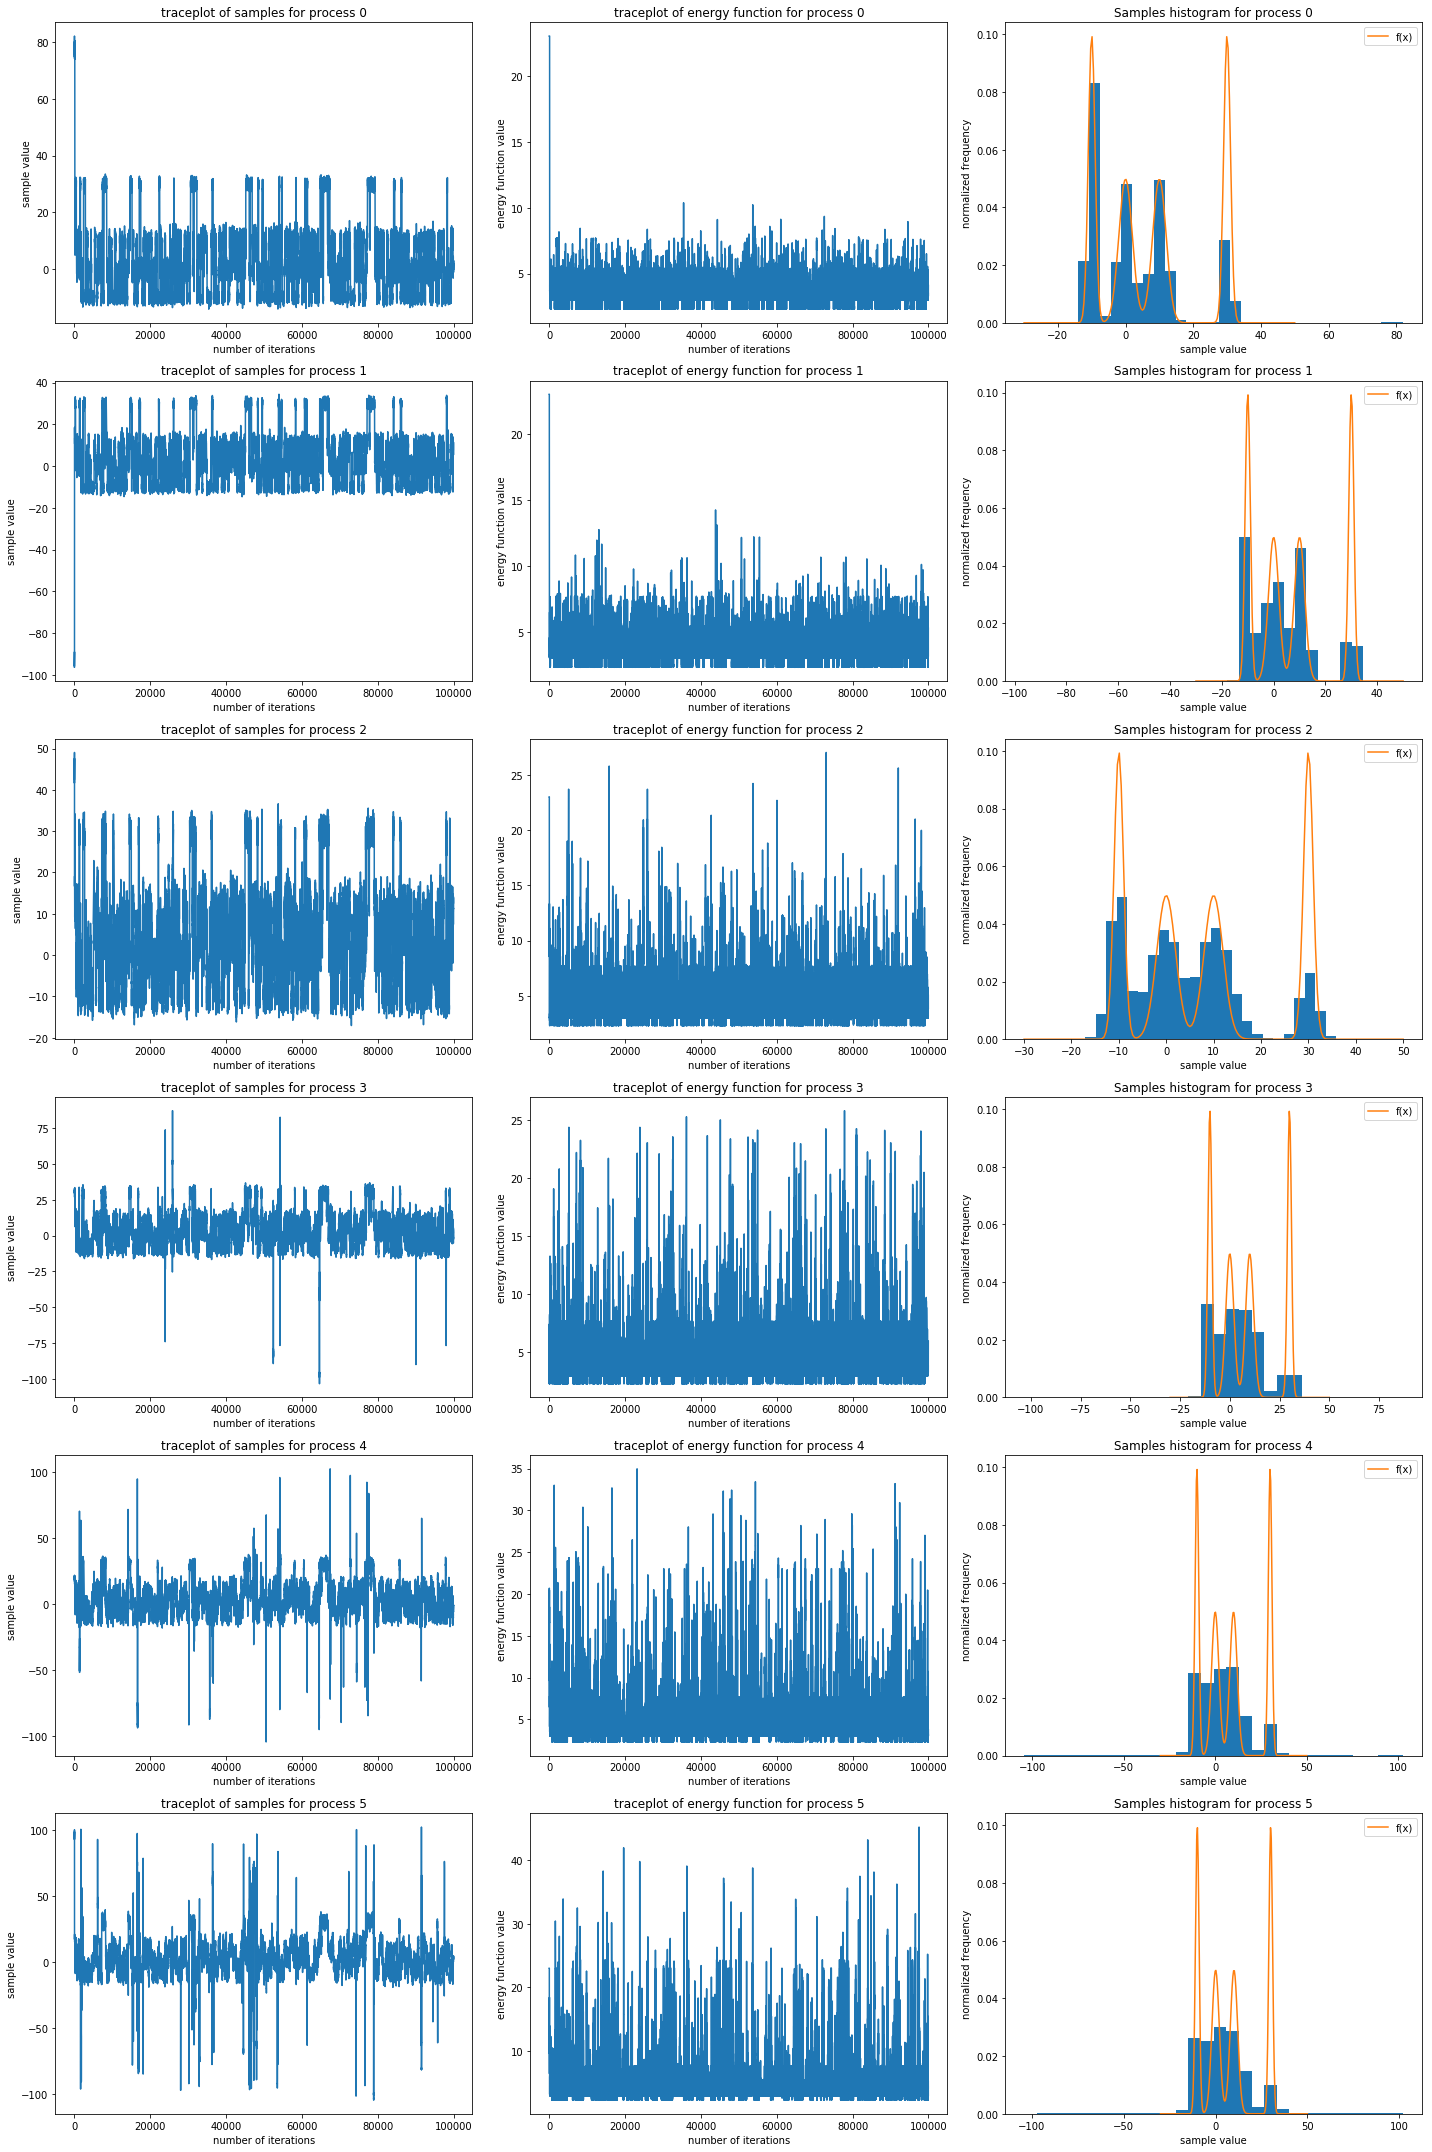

In [6]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

In [7]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

Agent 4 [T =6] accepted: 95.74%, received: 97.40%
Agent 0 [T =1] accepted: 75.12%, received: 87.89%
Total time elapsed: 760.4203410148621 seconds
Agent 5 [T =7.5] accepted: 96.37%, received: 0.00%
Agent 2 [T =3] accepted: 92.61%, received: 90.59%
Agent 1 [T =1.5] accepted: 79.84%, received: 50.35%
Agent 3 [T =4.5] accepted: 94.83%, received: 97.10%


#### Loading in the results

In [8]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 100000, 2)


#### Plotting the results

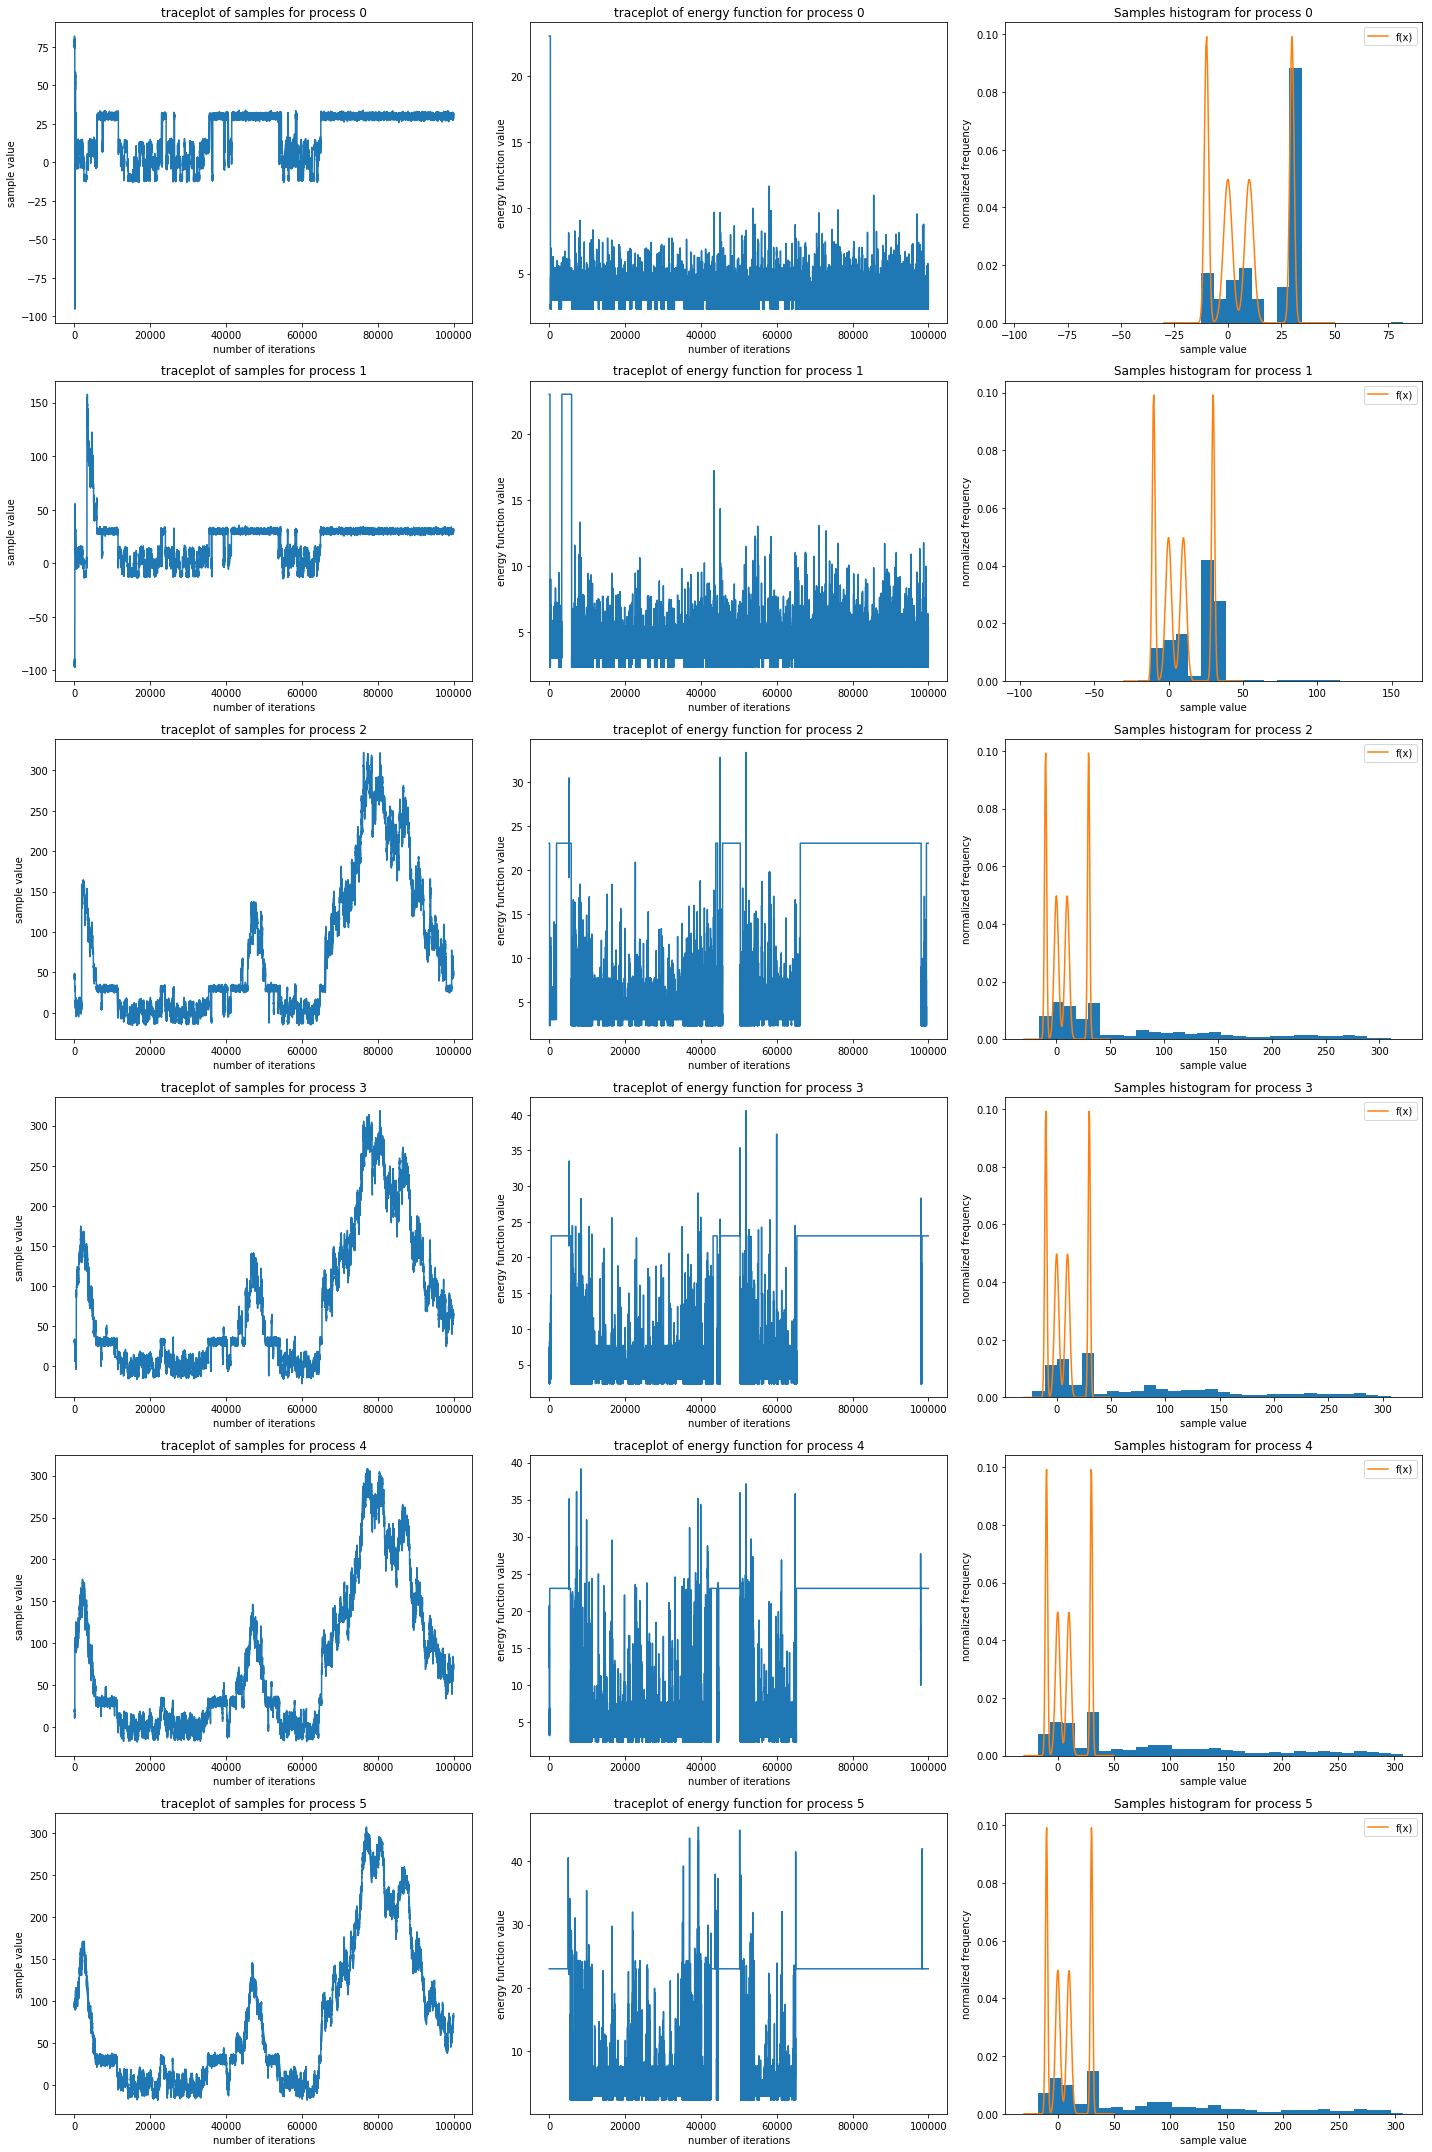

In [9]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()